In [60]:
import math
import numpy as np
import random


class TicTacToe:
    def __init__(self,size,epsilonGreedy,learningParam,symbol,primaryPlayer,valueF):
        self.valueF = dict(valueF)
        if symbol == 'O':
            for key in self.valueF:
                self.valueF[key] = 1 - self.valueF[key]
                
        self.epsilon = epsilonGreedy
        self.symbol = symbol
        self.primaryPlayer = primaryPlayer
        self.learningParam = learningParam
        self.size = size
        #if self.symbol == 'X':
        #    self.primaryPlayer = 1
        #else:
        #    self.primaryPlayer = -1
        for i in range(0,100):
            random.uniform(0,1)
    
    
    def TakeStep(self,state,training):
        if self.epsilon == 'random':
            self.epsilon = random.uniform(0,1)
            
        for i in range(0,10):
            random.uniform(0,1)
        r = random.uniform(0,1)
        if r < self.epsilon:
            currentState = state
            [state,winFlag] = self.StepRandom(state)
        else:
            currentState = state
            [state,winFlag] = self.StepOptimal(state)
        
        if training == 1:
            self.UpdateValueFunction(currentState,state)
            
        return [state,winFlag]
    
    
    def UpdateValueFunction(self,prevState,newState):
        self.valueF[prevState] = self.valueF[prevState] + self.learningParam*(self.valueF[newState]-self.valueF[prevState])        
    
    
    def StepOptimal(self,state):
        actions = self.PossibleActions(state)
        noActions = len(actions)
        if noActions == 0: #the board is filled, but no winner
            return [state,None]
        else:
            current = self.valueF[state]
            state = state[0:actions[0]] + self.symbol + state[actions[0]+1:]
            proposed = self.valueF[state]
            chosenActionSet = [actions[0]]
            state = state[0:actions[0]] + '.' + state[actions[0]+1:]
            for i in range(1,noActions):
                action = actions[i]
                state = state[0:action] + self.symbol + state[action+1:]
                if self.valueF[state] > proposed:
                    proposed = self.valueF[state]
                    chosenActionSet = [action]
                elif self.valueF[state] == proposed:
                    chosenActionSet.append(action)
                state = state[0:action] + '.' + state[action+1:]
            
            if len(chosenActionSet) > 1:
                r = random.randint(0,len(chosenActionSet)-1)
                chosenAction = chosenActionSet[r]
            else:
                chosenAction = chosenActionSet[0]
                
            state = state[0:chosenAction] + self.symbol + state[chosenAction+1:]
            winFlag = DetermineWinLose(state,self.size,self.primaryPlayer)
            return [state,winFlag]
    
    
    def StepRandom(self,state):
        actions = self.PossibleActions(state)
        noActions = len(actions)
        if noActions == 0: #the board is filled, but no winner
            return [state,None]
        else:
            ind = random.randint(0,noActions-1)
            chosenAction = actions[ind]
            state = state[0:chosenAction] + self.symbol + state[chosenAction+1:]
            
            winFlag = DetermineWinLose(state,self.size,self.primaryPlayer)
            return [state,winFlag]
            
    
    
    def PossibleActions(self,state):
        actions = []
        for i in range(0,self.size*self.size):
            if state[i] == '.':
                actions.append(i)
                
        return actions
        

        
def CreateInitialState(size):
    state = ''
    for i in range(0,size*size):
        state = state + '.'
        
    return state
        

def TrainingTicTacToe(noIterations,size,epsilon1,epsilon2,learningParam,valueFunction1,valueFunction2):
    initialState = CreateInitialState(size)
    #print "Training..."
    player1 = TicTacToe(size,epsilon1,learningParam,'X',1,valueFunction1)
    player2 = TicTacToe(size,epsilon2,learningParam,'O',1,valueFunction2)
    
    for i in range(0,noIterations):
        [playHistory,winFlag] = Play(initialState,player1,player2,size,1)
    
    #print "Training finished."
    return [player1.valueF,player2.valueF]



def TestingTicTacToe(noIterations,size,epsilon1,epsilon2,valueF1,valueF2):
    initialState = CreateInitialState(size)
    
    #print "Testing winning probability of solution..."
    player1 = TicTacToe(size,epsilon1,0,'X',1,valueF1)
    player2 = TicTacToe(size,epsilon2,0,'O',1,valueF2)
    
    winRatio = 0
    loseRatio = 0
    for i in range(0,noIterations):
        [playHistory,winFlag] = Play(initialState,player1,player2,size,0)
        if winFlag == 1:
            winRatio += winFlag
        elif winFlag == -1:
            loseRatio -= winFlag
    
    winRatio = float(winRatio)/noIterations
    loseRatio = float(loseRatio)/noIterations
    #print "Winning probabilities found."
    return [winRatio,loseRatio]
        


def TestingGeneralization(noIterations,size,epsilon1,epsilon2List,valueF1,valueF2):
    
    winRatio = 0
    loseRatio = 0
    for epsilon2 in epsilon2List:
        [winRatioPart,loseRatioPart] = TestingTicTacToe(noIterations,size,epsilon1,epsilon2,valueF1,valueF2)
        winRatio += winRatioPart
        loseRatio += loseRatioPart
        
    winRatio = float(winRatio)/len(epsilon2List)
    loseRatio = float(loseRatio)/len(epsilon2List)
    
    return [winRatio,loseRatio]
    

        
def Play(state,player1,player2,size,training):
    winFlag = 0
    playHistory = [state]
    
    if random.uniform(0,1) > 0.5:
        firstPlayer = player1
        training1 = training
        secondPlayer = player2
        training2 = 0
    else:
        firstPlayer = player2
        training1 = 0
        secondPlayer = player1
        training2 = training
    
    while winFlag == 0:
        [state,winFlag] = firstPlayer.TakeStep(state,training1)
        playHistory.append(state)
        if winFlag != 0:
            break
        [state,winFlag] = secondPlayer.TakeStep(state,training2)
        playHistory.append(state)
        
    return [playHistory,winFlag]
    
    
    
def InitializeValueFunction(size):
    valueFunction = {}
    
    allStates = ListAllStates(size*size)
    for state in allStates:
        winFlag = DetermineWinLose(state,size,1)
        if winFlag == 1: #win
            valueFunction[state] = 1
        elif winFlag == -1: #lose
            valueFunction[state] = 0
        else:
            valueFunction[state] = 0.5
            
    return valueFunction
        
        
def ListAllStates(linearSize):
    if linearSize == 1:
        states = []
        states.append('X')
        states.append('.')
        states.append('O')
        return states
    else:
        states = ListAllStates(linearSize-1)
        statesNew = []
        for state in states:
            state1 = state + 'X'
            state2 = state + '.'
            state3 = state + 'O'
            statesNew.append(state1)
            statesNew.append(state2)
            statesNew.append(state3)
        return statesNew
        

def DetermineWinLose(state,size,primaryPlayer):
    #primary player is 'X' if primaryPlayer=1
    # 'O' if it is -1
    stateMatrix = ConvertToMatrix(state,size)
    
    winFlag = FindWins(stateMatrix,size)
    
    return winFlag*primaryPlayer
    
    
    

def ConvertToMatrix(state,size):
    mtx = np.zeros((size,size),dtype=int)
    for i in range(0,len(state)):
        [row,col] = ConvertToDoubleIndex(i,size)
        if state[i] == 'X':
            mtx[row,col] = 1
        elif state[i] == 'O':
            mtx[row,col] = -1
    
    return mtx    
    

def ConvertToDoubleIndex(el,size):
    row = int(math.floor(el/size))
    col = el%size
    return [row,col]
    
    

def FindWins(movesMtx,size):
    mCols = sum(movesMtx)
    for el in mCols:
        if el == size:
            return 1
        if el == -size:
            return -1
    for i in range(0,size):
        if sum(movesMtx[i,:]) == size:
            return 1
        if sum(movesMtx[i,:]) == -size:
            return -1
    if np.trace(movesMtx) == size:
        return 1
    if np.trace(movesMtx) == -size:
        return -1
    if np.trace(movesMtx[::-1]) == size:
        return 1
    if np.trace(movesMtx[::-1]) == -size:
        return -1
    
    return 0

## Training once

In [72]:
trainingPars = [0,10,100,1000,10000,100000,1000000]
epsilon2List = [0.1,0.3,0.5,0.7,0.9]

In [73]:
size = 3
epsilon1 = 0.01
epsilon2 = 0.5
learningParam = 0.1
winRatioList = []
loseRatioList = []
winRatioRandList = []
loseRatioRandList = []

print "Creating Initial Value Function..."
valueFunction = InitializeValueFunction(size)
print "Initial Value Function Done."

print "Training and Testing solutions..."
for el in trainingPars:
    [valueF1,valueF2] = TrainingTicTacToe(el,size,epsilon1,epsilon2,learningParam,valueFunction,valueFunction)
    [winRatio,loseRatio] = TestingTicTacToe(10000,size,epsilon1,epsilon2,valueF1,valueFunction)
    [winRatioRand,loseRatioRand] = TestingGeneralization(1000,size,epsilon1,epsilon2List,valueF1,valueFunction)
    winRatioList.append(winRatio)
    loseRatioList.append(loseRatio)
    winRatioRandList.append(winRatioRand)
    loseRatioRandList.append(loseRatioRand)
    print "Parameter " + str(el) + " done."

print "Training and Testing finished."    

print winRatioList
print loseRatioList
print winRatioRandList
print loseRatioRandList

Creating Initial Value Function...
Initial Value Function Done.
Training and Testing solutions...
Parameter 0 done.
Parameter 10 done.
Parameter 100 done.
Parameter 1000 done.
Parameter 10000 done.
Parameter 100000 done.
Parameter 1000000 done.
Training and Testing finished.
[0.5729, 0.5602, 0.5732, 0.6341, 0.6822, 0.6719, 0.6797]
[0.3717, 0.386, 0.3714, 0.3223, 0.2823, 0.2918, 0.2798]
[0.5686, 0.5631999999999999, 0.5788, 0.6451999999999999, 0.6786, 0.67, 0.6769999999999999]
[0.3756, 0.3798, 0.3652, 0.31379999999999997, 0.2846, 0.2888, 0.28759999999999997]


In [ ]:
#epsilon = 0.1 playing against epsilon = 0.5, with trainingParam = 0.1
#noIterations = 10000 and 1000
#epsilon2List = [0.1,0.3,0.5,0.7,0.9]

#trainingPars = [0,10,100,1000,10000,100000,1000000]
#[0.5514, 0.5417, 0.5544, 0.6084, 0.6432, 0.6427, 0.6511]
#[0.3939, 0.3991, 0.3877, 0.342, 0.3171, 0.3185, 0.3104]
#[0.5468, 0.5586, 0.5499999999999999, 0.6161999999999999, 0.6456, 0.6448, 0.6748]
#[0.391, 0.3812, 0.39880000000000004, 0.3356, 0.314, 0.315, 0.2888]

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
noIter = 5000
x = [0.1,10,100,1000,10000,100000,1000000]
y = [0.5468, 0.5586, 0.5499999999999999, 0.6161999999999999, 0.6456, 0.6448, 0.6748]
y2 = [0.391, 0.3812, 0.39880000000000004, 0.3356, 0.314, 0.315, 0.2888]
error = []
error2 = []
for i in range(0,len(y)):
    error.append(math.sqrt(y[i]*noIter)/noIter)
    error2.append(math.sqrt(y2[i]*noIter)/noIter)

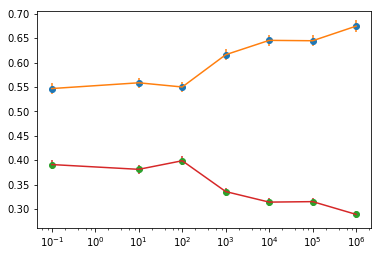

In [9]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x,y, 'o')
ax.errorbar(x,y,error)
ax.plot(x,y2, 'o')
ax.errorbar(x,y2,error2)
plt.show()

In [14]:
noIter = 5000
x = [0.1,10,100,1000,10000,100000,1000000]
y = [0.5584, 0.5596, 0.5718000000000001, 0.6188, 0.6534, 0.6512, 0.6528]
y2 = [0.381, 0.3804, 0.3712, 0.33280000000000004, 0.30480000000000007, 0.3116, 0.3096]
error = []
error2 = []
for i in range(0,len(y)):
    error.append(math.sqrt(y[i]*noIter)/noIter)
    error2.append(math.sqrt(y2[i]*noIter)/noIter)

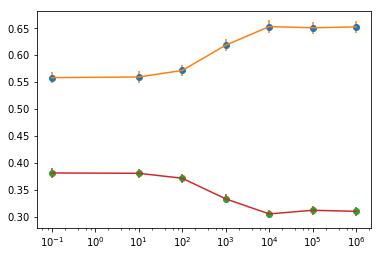

In [15]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x,y, 'o')
ax.errorbar(x,y,error)
ax.plot(x,y2, 'o')
ax.errorbar(x,y2,error2)
plt.show()

## Consecutive training

In [61]:
trainingPars = [0,10,100,1000,10000,100000,1000000]
epsilon2List = [0.1,0.3,0.5,0.7,0.9]

In [62]:
size = 3
epsilon1 = 0.1
epsilon2 = 0.1
epsilon2 = 'random'
learningParam = 0.1
#winRatioList = []
#loseRatioList = []
winRatioRandList = []
loseRatioRandList = []

print "Creating Initial Value Function..."
valueFunction = InitializeValueFunction(size)
print "Initial Value Function Done."

print "Training and Testing solutions..."
for el in trainingPars:
    [valueF1,valueF2] = TrainingTicTacToe(el,size,epsilon1,epsilon2,learningParam,valueFunction,valueFunction)
    #[winRatio,loseRatio] = TestingTicTacToe(10000,size,epsilon1,epsilon2,valueF1,valueFunction)
    [winRatioRand,loseRatioRand] = TestingGeneralization(1000,size,epsilon1,epsilon2List,valueF1,valueFunction)
    #winRatioList.append(winRatio)
    #loseRatioList.append(loseRatio)
    winRatioRandList.append(winRatioRand)
    loseRatioRandList.append(loseRatioRand)
    print "Parameter " + str(el) + " done."

print "Training and Testing finished."    

#print winRatioList
#print loseRatioList
print winRatioRandList
print loseRatioRandList

Creating Initial Value Function...
Initial Value Function Done.
Training and Testing solutions...
Parameter 0 done.
Parameter 10 done.
Parameter 100 done.
Parameter 1000 done.
Parameter 10000 done.
Parameter 100000 done.
Parameter 1000000 done.
Training and Testing finished.
[0.5362, 0.5327999999999999, 0.5614, 0.6188, 0.6322, 0.658, 0.6496]
[0.40040000000000003, 0.40580000000000005, 0.37939999999999996, 0.3324, 0.33140000000000003, 0.3, 0.312]


In [ ]:
# Training eps = 0.1 against untrained random eps opponents, testing against untrained spectrum of eps's
#[0.5362, 0.5327999999999999, 0.5614, 0.6188, 0.6322, 0.658, 0.6496]
#[0.40040000000000003, 0.40580000000000005, 0.37939999999999996, 0.3324, 0.33140000000000003, 0.3, 0.312]

In [ ]:
# Training eps = 0.1 against its previous version; testing it against untrained spectrum of eps's
#[0.6442,0.643,0.6334,0.6292]
#[0.31479999999999997,0.3116,0.3334,0.3336]

In [41]:
# TRaining eps = 0.1 against its previous version; testing it against eps spectrum with eps=0.1's current value function
#[0.5006,0.5793999999999999,0.555,0.5886,0.5668,0.5862,0.5691999999999999,0.583]
#[0.4128,0.3604,0.384,0.35019999999999996,0.37279999999999996,0.3592,0.3678,0.3568]

In [ ]:
# Training eps = 0.1 against its untrained version, testing against untrained spectrum of eps's
#[0.5428, 0.5444, 0.5496000000000001, 0.6172, 0.6444, 0.6516, 0.6484]
#[0.3964, 0.3993999999999999, 0.386, 0.3296, 0.31779999999999997, 0.30639999999999995, 0.31060000000000004]

### Training eps = 0.1 against its untrained version, testing against untrained spectrum of eps's

In [44]:
noIter = 5000
x = [0.1,10,100,1000,10000,100000,1000000]
y = [0.5428, 0.5444, 0.5496000000000001, 0.6172, 0.6444, 0.6516, 0.6484]
y2 = [0.3964, 0.3993999999999999, 0.386, 0.3296, 0.31779999999999997, 0.30639999999999995, 0.31060000000000004]
error = []
error2 = []
for i in range(0,len(y)):
    error.append(math.sqrt(y[i]*noIter)/noIter)
    error2.append(math.sqrt(y2[i]*noIter)/noIter)

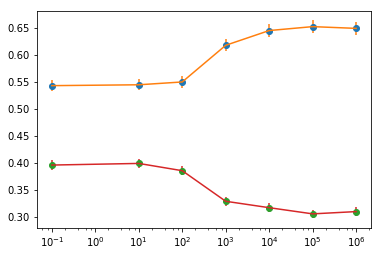

In [45]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x,y, 'o')
ax.errorbar(x,y,error)
ax.plot(x,y2, 'o')
ax.errorbar(x,y2,error2)
plt.show()

### Training eps = 0.1 against its previous version; testing it against eps spectrum with eps=0.1's current value function

In [42]:
noIter = 5000
x = [1,2,3,4,5,6,7,8]
y = [0.5006,0.5793999999999999,0.555,0.5886,0.5668,0.5862,0.5691999999999999,0.583]
y2 = [0.4128,0.3604,0.384,0.35019999999999996,0.37279999999999996,0.3592,0.3678,0.3568]
error = []
error2 = []
for i in range(0,len(y)):
    error.append(math.sqrt(y[i]*noIter)/noIter)
    error2.append(math.sqrt(y2[i]*noIter)/noIter)

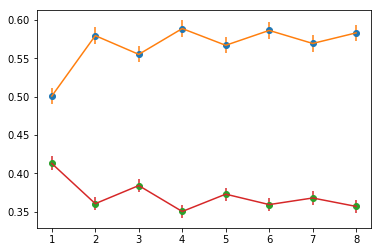

In [43]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
#ax.set_xscale('log')
ax.plot(x,y, 'o')
ax.errorbar(x,y,error)
ax.plot(x,y2, 'o')
ax.errorbar(x,y2,error2)
plt.show()

### Training eps = 0.1 against its previous version; testing it against untrained spectrum of eps's

In [57]:
noIter = 5000
x = [1,2,3,4]
y = [0.6442,0.643,0.6334,0.6292]
y2 = [0.31479999999999997,0.3116,0.3334,0.3336]
error = []
error2 = []
for i in range(0,len(y)):
    error.append(math.sqrt(y[i]*noIter)/noIter)
    error2.append(math.sqrt(y2[i]*noIter)/noIter)

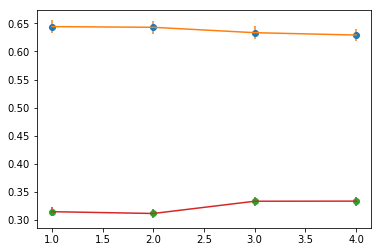

In [58]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
#ax.set_xscale('log')
ax.plot(x,y, 'o')
ax.errorbar(x,y,error)
ax.plot(x,y2, 'o')
ax.errorbar(x,y2,error2)
plt.show()

Notes:
* Training against previous version (i.e. slowly evolving version) doesn't seem to work.
* This could be due to the fact that we only train against _itself_, i.e. against eps = 0.1, and thus we "overfit", see the last figure for how it generalizes!

Conclusion:
* We don't have to abandon training against evolving versions, but we'd have to vary the this evolving opponent. It's not immediately clear how.
* As a first step, we could try training against non-evolving, but more varied opponents (e.g. be randomizing the opponent's epsilon)

In [ ]:
# Training eps = 0.1 against untrained random eps opponents, testing against untrained spectrum of eps's
#[0.5362, 0.5327999999999999, 0.5614, 0.6188, 0.6322, 0.658, 0.6496]
#[0.40040000000000003, 0.40580000000000005, 0.37939999999999996, 0.3324, 0.33140000000000003, 0.3, 0.312]

### Training eps = 0.1 against untrained random eps opponents, testing against untrained spectrum of eps's

In [63]:
noIter = 5000
x = [0.1,10,100,1000,10000,100000,1000000]
y = [0.5362, 0.5327999999999999, 0.5614, 0.6188, 0.6322, 0.658, 0.6496]
y2 = [0.40040000000000003, 0.40580000000000005, 0.37939999999999996, 0.3324, 0.33140000000000003, 0.3, 0.312]
error = []
error2 = []
for i in range(0,len(y)):
    error.append(math.sqrt(y[i]*noIter)/noIter)
    error2.append(math.sqrt(y2[i]*noIter)/noIter)

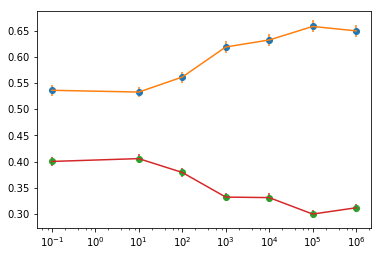

In [64]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x,y, 'o')
ax.errorbar(x,y,error)
ax.plot(x,y2, 'o')
ax.errorbar(x,y2,error2)
plt.show()

Comments:
* Winning probability > 0.5 for untrained player is (still) troubling. When we tested against _itself_, winning prob. was ~ 0.5, so possibly eps = 0.1 is simply better on average than the spectrum of opponents we test against.
* Trying to increase winning prob. above 2/3 didn't work so far. Maybe eps = 0.1 is not greedy enough?

## Trained once

In [ ]:
#epsilon = 0.03 playing against epsilon = 0.5, with trainingParam = 0.1
#noIterations = 10000 and 1000
#epsilon2List = [0.1,0.3,0.5,0.7,0.9]

#[0.5658, 0.557, 0.5758, 0.6396000000000001, 0.6712, 0.6596, 0.6714]
#[0.37720000000000004, 0.3802, 0.36899999999999994, 0.31439999999999996, 0.29460000000000003, 0.30460000000000004, 0.29200000000000004]

In [ ]:
# epsilon = 0.1

#[0.5452, 0.5516, 0.5494, 0.624, 0.6592, 0.6426, 0.6487999999999999]
#[0.394, 0.3886, 0.39080000000000004, 0.33680000000000004, 0.29979999999999996, 0.3126, 0.312]

In [ ]:
# epsilon = 0.01

#[0.5686, 0.5631999999999999, 0.5788, 0.6451999999999999, 0.6786, 0.67, 0.6769999999999999]
#[0.3756, 0.3798, 0.3652, 0.31379999999999997, 0.2846, 0.2888, 0.28759999999999997]

In [74]:
noIter = 5000
x = [0.1,10,100,1000,10000,100000,1000000]
y = [0.5452, 0.5516, 0.5494, 0.624, 0.6592, 0.6426, 0.6487999999999999]
y2 = [0.394, 0.3886, 0.39080000000000004, 0.33680000000000004, 0.29979999999999996, 0.3126, 0.312]
y_03 = [0.5658, 0.557, 0.5758, 0.6396000000000001, 0.6712, 0.6596, 0.6714]
y2_03 = [0.37720000000000004, 0.3802, 0.36899999999999994, 0.31439999999999996, 0.29460000000000003, 0.30460000000000004, 0.29200000000000004]
y_01 = [0.5686, 0.5631999999999999, 0.5788, 0.6451999999999999, 0.6786, 0.67, 0.6769999999999999]
y2_01 = [0.3756, 0.3798, 0.3652, 0.31379999999999997, 0.2846, 0.2888, 0.28759999999999997]
error = []
error2 = []
error_03 = []
error2_03 = []
error_01 = []
error2_01 = []
for i in range(0,len(y)):
    error.append(math.sqrt(y[i]*noIter)/noIter)
    error2.append(math.sqrt(y2[i]*noIter)/noIter)
    error_03.append(math.sqrt(y_03[i]*noIter)/noIter)
    error2_03.append(math.sqrt(y2_03[i]*noIter)/noIter)
    error_01.append(math.sqrt(y_03[i]*noIter)/noIter)
    error2_01.append(math.sqrt(y2_03[i]*noIter)/noIter)

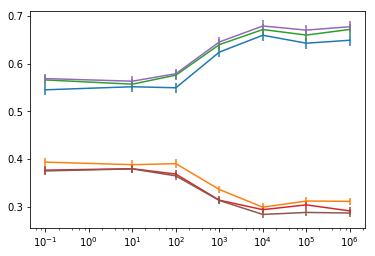

In [75]:
matplotlib.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
ax.set_xscale('log')
#ax.plot(x,y, 'o')
ax.errorbar(x,y,error)
#ax.plot(x,y2, 'o')
ax.errorbar(x,y2,error2)
#ax.plot(x,y_03, 'o')
ax.errorbar(x,y_03,error_03)
#ax.plot(x,y2_03, 'o')
ax.errorbar(x,y2_03,error2_03)
#ax.plot(x,y_01, 'o')
ax.errorbar(x,y_01,error_01)
#ax.plot(x,y2_01, 'o')
ax.errorbar(x,y2_01,error2_01)
plt.show()